In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

matplotlib.rcParams['figure.figsize'] = (8, 12)
%matplotlib inline

In [124]:
VOLUME_FILE_PATH = "..\data\WB_Volume.csv"

In [125]:
df_volume = pd.read_csv(VOLUME_FILE_PATH, index_col=False)
df_volume.head()

,Station,Date,0:0,0:1,0:2,0:3,0:4,0:5,0:6,0:7,...,23:50,23:51,23:52,23:53,23:54,23:55,23:56,23:57,23:58,23:59
0,2743,20180401,26.0,34.0,22.0,21,25.0,29,21,27,...,15.0,10.0,16.0,18.0,6.0,14.0,17.0,8.0,14.0,12.0
1,2743,20180402,16.0,14.0,9.0,18,14.0,16,9,10,...,16.0,14.0,18.0,8.0,15.0,15.0,14.0,9.0,15.0,16.0
2,2743,20180403,17.0,5.0,13.0,9,16.0,26,9,9,...,29.0,15.0,14.0,19.0,18.0,8.0,17.0,14.0,28.0,8.0
3,2743,20180404,23.0,10.0,12.0,21,16.0,15,11,12,...,26.0,14.0,19.0,19.0,15.0,12.0,24.0,14.0,11.0,11.0
4,2743,20180405,22.0,10.0,23.0,16,22.0,26,10,10,...,14.0,13.0,27.0,29.0,26.0,25.0,35.0,18.0,16.0,28.0


In [5]:
# Wide to long
hrs = list(range(24))
minutes = list(range(60))
timestamps = [str(h)+':'+str(m) for h in hrs for m in minutes]

df_volume_long = pd.melt(df_volume, id_vars=['Station', 'Date'], value_vars=timestamps, var_name='Time', value_name='Volume')
df_volume_long.sort_values(by=['Station', 'Date', 'Time']).head(10)

,Station,Date,Time,Volume
0,2743,20180401,0:0,26.0
90,2743,20180401,0:1,34.0
900,2743,20180401,0:10,29.0
990,2743,20180401,0:11,25.0
1080,2743,20180401,0:12,25.0
1170,2743,20180401,0:13,24.0
1260,2743,20180401,0:14,29.0
1350,2743,20180401,0:15,25.0
1440,2743,20180401,0:16,13.0
1530,2743,20180401,0:17,39.0


In [6]:
df_volume_long['Date'] =df_volume_long.Date.map(str)

In [7]:
# Reformat the Time column to a two-digit hour and minute
def to_2digit_time(timestr):
    """
    
    To 2-digit time string. 
    timestr: a time string like 1:5, which means 01:05
    
    """
    
    h, m = timestr.split(':')
    if int(h) < 10:
        h_str = "0"+h
    else:
        h_str = h
    
    if int(m) < 10:
        m_str = "0"+m
    else:
        m_str = m
        
    return h_str+":"+m_str


timestr = "13:5"
print(to_2digit_time(timestr))
    

13:05


In [8]:
df_volume_long['Time'] = df_volume_long.Time.map(to_2digit_time)

In [9]:
# Create the datetime index
df_volume_long['TimeStamp'] = df_volume_long[['Date', 'Time']].apply(lambda x: ' '.join(x), axis=1)
df_volume_long.head()
df_volume_long.TimeStamp = pd.to_datetime(df_volume_long.TimeStamp, format='%Y%m%d %H:%M')
df_volume_long = df_volume_long.set_index("TimeStamp")

In [10]:
# Add a day-of-week feature
df_volume_long['Day_of_week'] = df_volume_long.index.dayofweek
df_volume_long.head()

,Station,Date,Time,Volume,Day_of_week
TimeStamp,,,,,
2018-04-01,2743,20180401,00:00,26.0,6
2018-04-02,2743,20180402,00:00,16.0,0
2018-04-03,2743,20180403,00:00,17.0,1
2018-04-04,2743,20180404,00:00,23.0,2
2018-04-05,2743,20180405,00:00,22.0,3


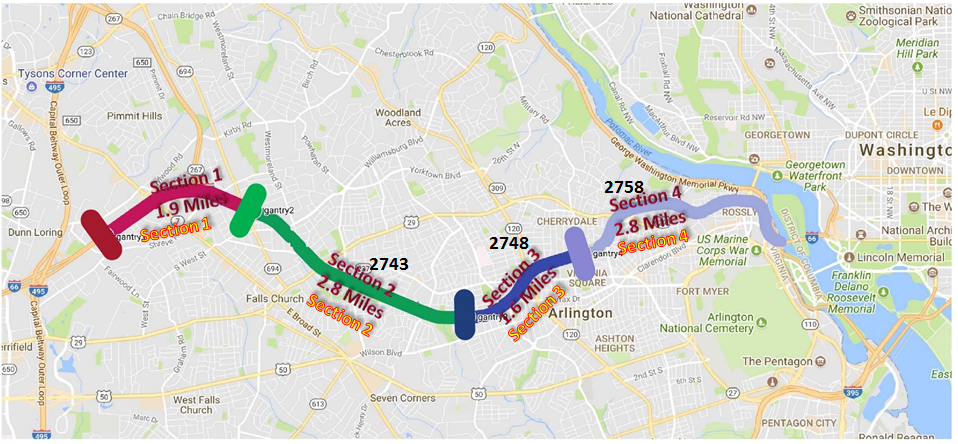

In [11]:
Image(filename = "..\data\Count_Stations.png")

In [12]:
# Add the location
location_map = {
    2743: 'Section 2',
    2748: 'Section 3',
    2758: 'Section 4'
}
df_volume_long['Section'] = df_volume_long.Station.map(location_map)
df_volume_long.head()


,Station,Date,Time,Volume,Day_of_week,Section
TimeStamp,,,,,,
2018-04-01,2743,20180401,00:00,26.0,6,Section 2
2018-04-02,2743,20180402,00:00,16.0,0,Section 2
2018-04-03,2743,20180403,00:00,17.0,1,Section 2
2018-04-04,2743,20180404,00:00,23.0,2,Section 2
2018-04-05,2743,20180405,00:00,22.0,3,Section 2


### Resample into 6-minute interval

In [106]:
df_volume_6m = df_volume_long.loc[:,["Station", "Volume", "Section"]].groupby([pd.Grouper(freq='6min'), 'Station', 'Section']).sum()
df_volume_6m = df_volume_6m.reset_index(level=[-1,-2])
df_volume_6m.head(10)

,Station,Section,Volume
TimeStamp,,,
2018-04-01 00:00:00,2743,Section 2,157.0
2018-04-01 00:00:00,2748,Section 3,124.0
2018-04-01 00:00:00,2758,Section 4,105.0
2018-04-01 00:06:00,2743,Section 2,161.0
2018-04-01 00:06:00,2748,Section 3,136.0
2018-04-01 00:06:00,2758,Section 4,121.0
2018-04-01 00:12:00,2743,Section 2,155.0
2018-04-01 00:12:00,2748,Section 3,117.0
2018-04-01 00:12:00,2758,Section 4,111.0


### Volume evolution by station and day

In [107]:
df = df_volume_6m.loc['2018-04-02 15:00':'2018-04-02 19:00']

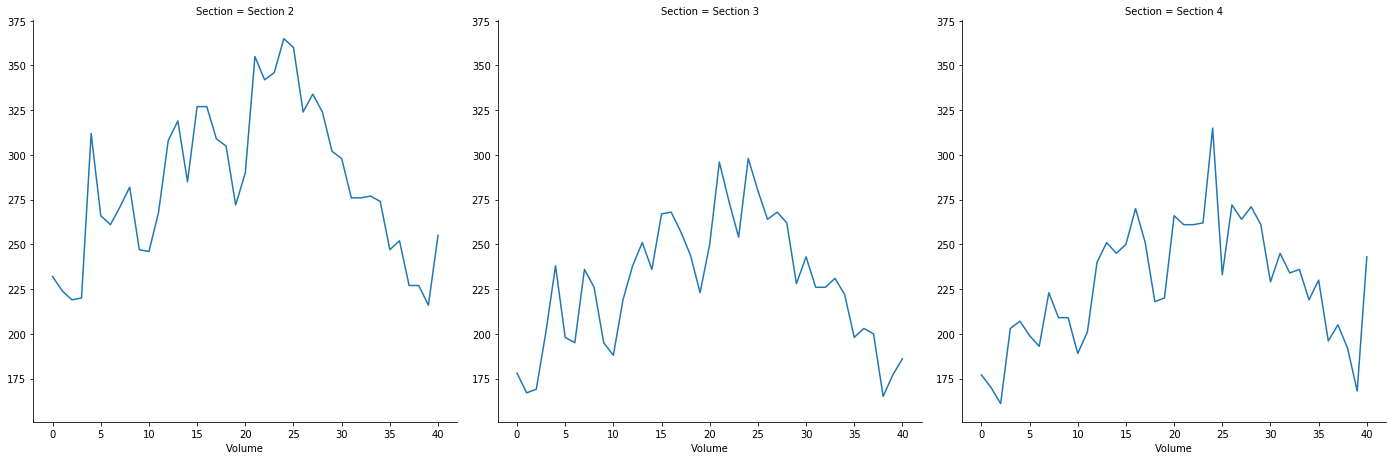

In [108]:
g = sns.FacetGrid(df, col='Section', size=6.5, aspect=1,sharey=True)
g.map(plt.plot, "Volume")

### Clean the toll data

In [24]:
TOLL_FILE_PATH = "..\data\WB_Tolls.csv"

In [50]:
header = pd.read_csv(TOLL_FILE_PATH, index_col=False, nrows=2)
dates = header.columns.tolist()[1:]
selector = [d.startswith('2018') for d in dates]
dates = [d for (d,b) in zip(dates, selector) if b]
dates

['2018-04-02',
 '2018-04-03',
 '2018-04-04',
 '2018-04-05',
 '2018-04-06',
 '2018-04-09',
 '2018-04-10',
 '2018-04-11',
 '2018-04-12',
 '2018-04-13',
 '2018-04-16',
 '2018-04-17',
 '2018-04-18',
 '2018-04-19',
 '2018-04-20',
 '2018-04-23',
 '2018-04-24',
 '2018-04-25',
 '2018-04-26',
 '2018-04-27',
 '2018-04-30']

In [58]:
sections = header.iloc[0].tolist()[1:5]
sections = list(map(int, sections))
sections

[3200, 3210, 3220, 3230]

In [59]:
# create the multiindex
columns = pd.MultiIndex.from_product([dates, sections])
columns

MultiIndex(levels=[['2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-30'], [3200, 3210, 3220, 3230]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]])

In [78]:
# read in the actual data
tolls = pd.read_csv(TOLL_FILE_PATH, index_col=0, skiprows=2, header=None)
tolls.columns = columns
tolls = tolls.reset_index()
tolls.head()

0 2018-04-02                   2018-04-03                     \
                  3200  3210 3220   3230       3200  3210   3220  3230   
0  14:48:00       0.50  1.00  1.5   2.00       0.50   1.0   1.50   2.0   
1  14:54:00       0.50  1.00  2.0   3.25       0.50   1.0   1.50   6.0   
2  15:00:00       3.25  7.00  8.0   9.25       6.50   7.0   7.50  12.0   
3  15:06:00       3.25  8.25  9.5  10.50      12.25  13.0  13.50  18.0   
4  15:12:00       3.25  4.50  5.5   6.00       4.00   8.0   9.25  10.0   

  2018-04-04  ...  2018-04-26       2018-04-27                       \
        3200  ...        3220  3230       3200   3210   3220   3230   
0       0.50  ...        1.50   2.0       0.50   1.00   1.50   2.00   
1       0.50  ...        1.50   6.0       0.50   1.00   1.50   6.25   
2       4.00  ...        7.50  12.0       3.75   7.00   7.50  12.25   
3       2.75  ...       13.25  18.0       3.75  10.25  11.50  16.00   
4       2.75  ...       10.25  12.0       3.75   5.50   6.75   7.75   

  2018-04-30                   
        3200 3210  3220  3230  
0       0.50  1.0  1.50  2.00  
1       0.50  1.0  1.75  3.50  
2       2.75  7.0  7.75  9.50  
3       2.75  7.0  7.75  9.00  
4       2.25  3.5  4.25  5.25  

[5 rows x 85 columns]

In [82]:
df_tolls = pd.melt(tolls,id_vars=0, var_name=["Date","Section"], value_name="Toll").rename(columns={0:"Time"})
df_tolls.head(20)

,Time,Date,Section,Toll
0,14:48:00,2018-04-02,3200,0.50
1,14:54:00,2018-04-02,3200,0.50
2,15:00:00,2018-04-02,3200,3.25
3,15:06:00,2018-04-02,3200,3.25
4,15:12:00,2018-04-02,3200,3.25
5,15:18:00,2018-04-02,3200,2.75
6,15:24:00,2018-04-02,3200,3.50
7,15:30:00,2018-04-02,3200,3.50
8,15:36:00,2018-04-02,3200,3.00
9,15:42:00,2018-04-02,3200,3.00


In [84]:
# Convert to datetimeindex
df_tolls["Datetime"] = df_tolls[['Date','Time']].apply(lambda x: ' '.join(x), axis=1)
df_tolls["Datetime"] = pd.to_datetime(df_tolls.Datetime)
df_tolls = df_tolls.set_index("Datetime")
df_tolls.head()

,Time,Date,Section,Toll
Datetime,,,,
2018-04-02 14:48:00,14:48:00,2018-04-02,3200,0.50
2018-04-02 14:54:00,14:54:00,2018-04-02,3200,0.50
2018-04-02 15:00:00,15:00:00,2018-04-02,3200,3.25
2018-04-02 15:06:00,15:06:00,2018-04-02,3200,3.25
2018-04-02 15:12:00,15:12:00,2018-04-02,3200,3.25


### Toll evolution

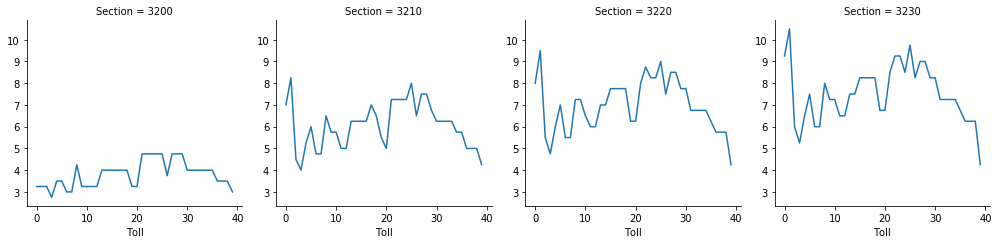

In [109]:
df_tolls_select = df_tolls.loc['2018-04-02 15:00':'2018-04-02 19:00']
g = sns.FacetGrid(df_tolls_select, col="Section", size=3.5, aspect=1)
g = g.map(plt.plot, "Toll")

### Relation between Toll and Volume 

In [116]:
df_toll_merge = df_tolls.loc['2018-04-02 15:15':'2018-04-02 19:00', ['Section','Toll']]
df_volume_merge = df_volume_6m.loc['2018-04-02 15:00':'2018-04-02 19:00']
df_toll_volume = pd.merge(df_toll_merge, df_volume_merge, how='inner', left_index=True, right_index=True, suffixes=["_Toll","_Count"])
df_toll_volume.head(10)

,Section_Toll,Toll,Station,Section_Count,Volume
2018-04-02 15:18:00,3200,2.75,2743,Section 2,220.0
2018-04-02 15:18:00,3200,2.75,2748,Section 3,201.0
2018-04-02 15:18:00,3200,2.75,2758,Section 4,203.0
2018-04-02 15:18:00,3210,4.00,2743,Section 2,220.0
2018-04-02 15:18:00,3210,4.00,2748,Section 3,201.0
2018-04-02 15:18:00,3210,4.00,2758,Section 4,203.0
2018-04-02 15:18:00,3220,4.75,2743,Section 2,220.0
2018-04-02 15:18:00,3220,4.75,2748,Section 3,201.0
2018-04-02 15:18:00,3220,4.75,2758,Section 4,203.0
2018-04-02 15:18:00,3230,5.25,2743,Section 2,220.0


In [114]:
# Plot the toll and volume by section combination
df_toll_volume.loc[(df_toll_volume.Section_Toll == 3230) & (df_toll_volume.Section_Count == "Section 2")]

,Section_Toll,Toll,Station,Section_Count,Volume
2018-04-02 15:00:00,3230,9.25,2743,Section 2,232.0
2018-04-02 15:06:00,3230,10.50,2743,Section 2,224.0
2018-04-02 15:12:00,3230,6.00,2743,Section 2,219.0
2018-04-02 15:18:00,3230,5.25,2743,Section 2,220.0
2018-04-02 15:24:00,3230,6.50,2743,Section 2,312.0
2018-04-02 15:30:00,3230,7.50,2743,Section 2,266.0
2018-04-02 15:36:00,3230,6.00,2743,Section 2,261.0
2018-04-02 15:42:00,3230,6.00,2743,Section 2,271.0
2018-04-02 15:48:00,3230,8.00,2743,Section 2,282.0
2018-04-02 15:54:00,3230,7.25,2743,Section 2,247.0


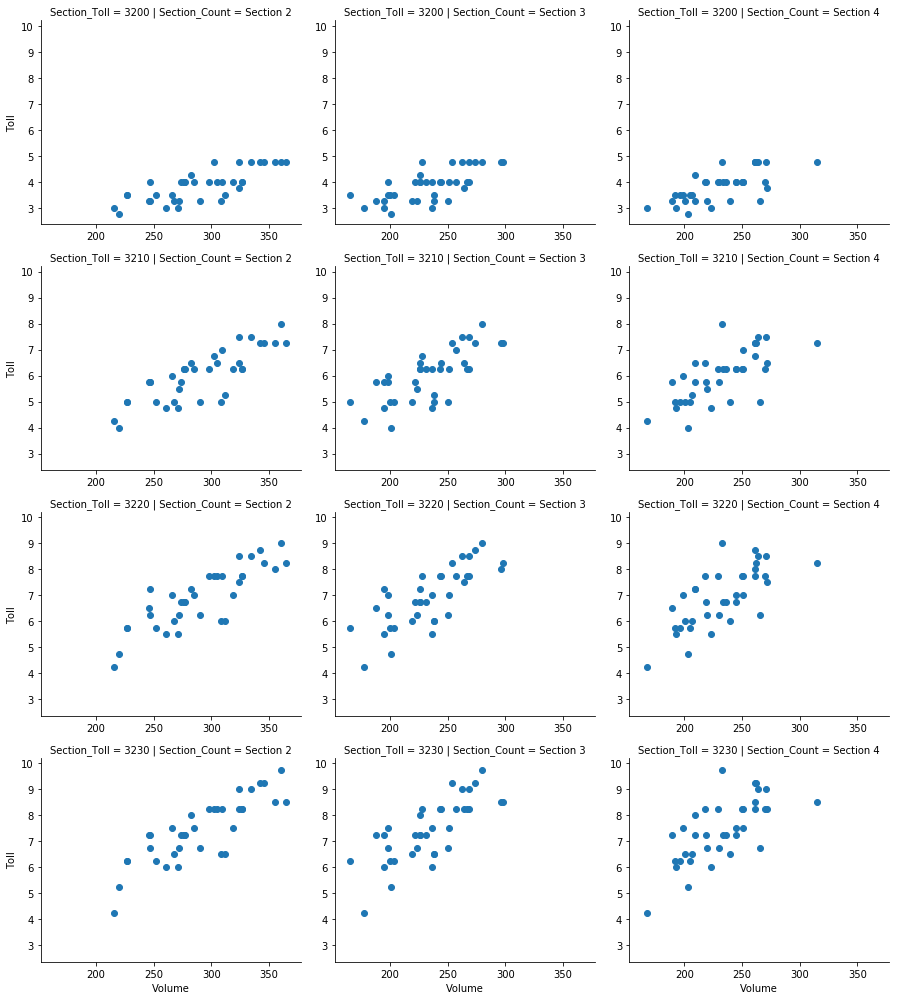

In [117]:
g = sns.FacetGrid(df_toll_volume, row="Section_Toll", col="Section_Count", size=3.5, aspect=1.2)
g = g.map(plt.scatter, "Volume", "Toll")

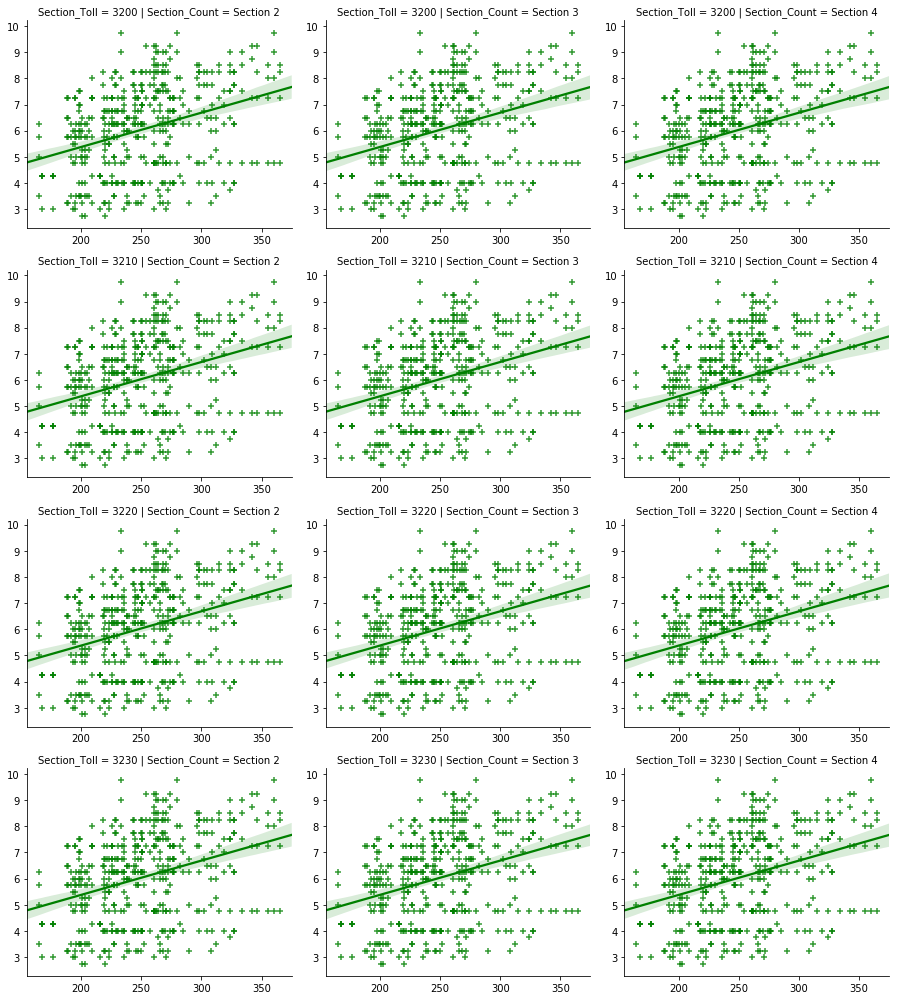

In [123]:
g = sns.FacetGrid(df_toll_volume, row="Section_Toll", col="Section_Count", size=3.5, aspect=1.2)
g = g.map(sns.regplot, x="Volume", y="Toll", data=df_toll_volume, marker="+", color='g')